# Supply Chain Shipment Pricing Data- EDA
Dataset Description: This data set provides supply chain health commodity shipment and pricing data.

https://www.kaggle.com/divyeshardeshana/supply-chain-shipment-price-data-analysis


In [125]:
#importing packages
import pandas as pd
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [126]:
#readcsv
df = pd.read_csv("SCMS_Delivery_History_Dataset.csv")

In [127]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [129]:
TotalRowCount_Before = len(df)
print("Total Number of Data Count :", TotalRowCount)

Total Number of Data Count : 10324


## Data Cleaning and Manipulation

In [130]:
# change the invoice_date format - String to Timestamp format
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'])
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'])


In [131]:
#checking missing values
df.isnull().sum().sort_values(ascending=False)


Dosage                          1736
Shipment Mode                    360
Line Item Insurance (USD)        287
Molecule/Test Type                 0
Brand                              0
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Vendor                             0
Pack Price                         0
Unit Price                         0
Manufacturing Site                 0
First Line Designation             0
Weight (Kilograms)                 0
Freight Cost (USD)                 0
Item Description                   0
ID                                 0
Project Code                       0
Product Group                      0
Delivery Recorded Date             0
Delivered to Client Date           0
Scheduled Delivery Date            0
PO Sent to Vendor Date             0
PQ First Sent to Client Date       0
Vendor INCO Term                   0
Fulfill Via                        0
M

In [132]:
#missing value rows
df[df.isnull().any(axis=1)].head(10)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
5,23,112-NG-T01,Pre-PQ Process,SCMS-87,ASN-57,Nigeria,PMO - US,Direct Drop,EXW,Air,...,240,416,2225.60,5.35,0.02,"Aurobindo Unit III, India",Yes,504,5920.42,NaN
6,44,110-ZM-T01,Pre-PQ Process,SCMS-139,ASN-130,Zambia,PMO - US,Direct Drop,DDU,Air,...,90,135,4374.00,32.40,0.36,MSD South Granville Australia,Yes,328,Freight Included in Commodity Cost,NaN
7,45,109-TZ-T01,Pre-PQ Process,SCMS-140,ASN-94,Tanzania,PMO - US,Direct Drop,EXW,Air,...,60,16667,60834.55,3.65,0.06,"Aurobindo Unit III, India",Yes,1478,6212.41,NaN
8,46,112-NG-T01,Pre-PQ Process,SCMS-156,ASN-93,Nigeria,PMO - US,Direct Drop,EXW,Air,...,60,273,532.35,1.95,0.03,"Aurobindo Unit III, India",No,See ASN-93 (ID#:1281),See ASN-93 (ID#:1281),NaN
9,47,110-ZM-T01,Pre-PQ Process,SCMS-165,ASN-199,Zambia,PMO - US,Direct Drop,CIP,Air,...,120,2800,115080.00,41.10,0.34,ABBVIE (Abbott) St. P'burg USA,Yes,643,Freight Included in Commodity Cost,NaN


In [133]:
#dropping missing values
df = df.dropna()
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8158 entries, 21 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            8158 non-null   int64         
 1   Project Code                  8158 non-null   object        
 2   PQ #                          8158 non-null   object        
 3   PO / SO #                     8158 non-null   object        
 4   ASN/DN #                      8158 non-null   object        
 5   Country                       8158 non-null   object        
 6   Managed By                    8158 non-null   object        
 7   Fulfill Via                   8158 non-null   object        
 8   Vendor INCO Term              8158 non-null   object        
 9   Shipment Mode                 8158 non-null   object        
 10  PQ First Sent to Client Date  8158 non-null   object        
 11  PO Sent to Vendor Date      

## EDA

Top 10 Countries Wise Count 

South Africa     1364
Nigeria           952
Côte d'Ivoire     827
Uganda            724
Vietnam           661
Haiti             549
Mozambique        506
Zimbabwe          471
Zambia            470
Tanzania          374
Name: Country, dtype: int64


C:\Users\anant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Country Name')

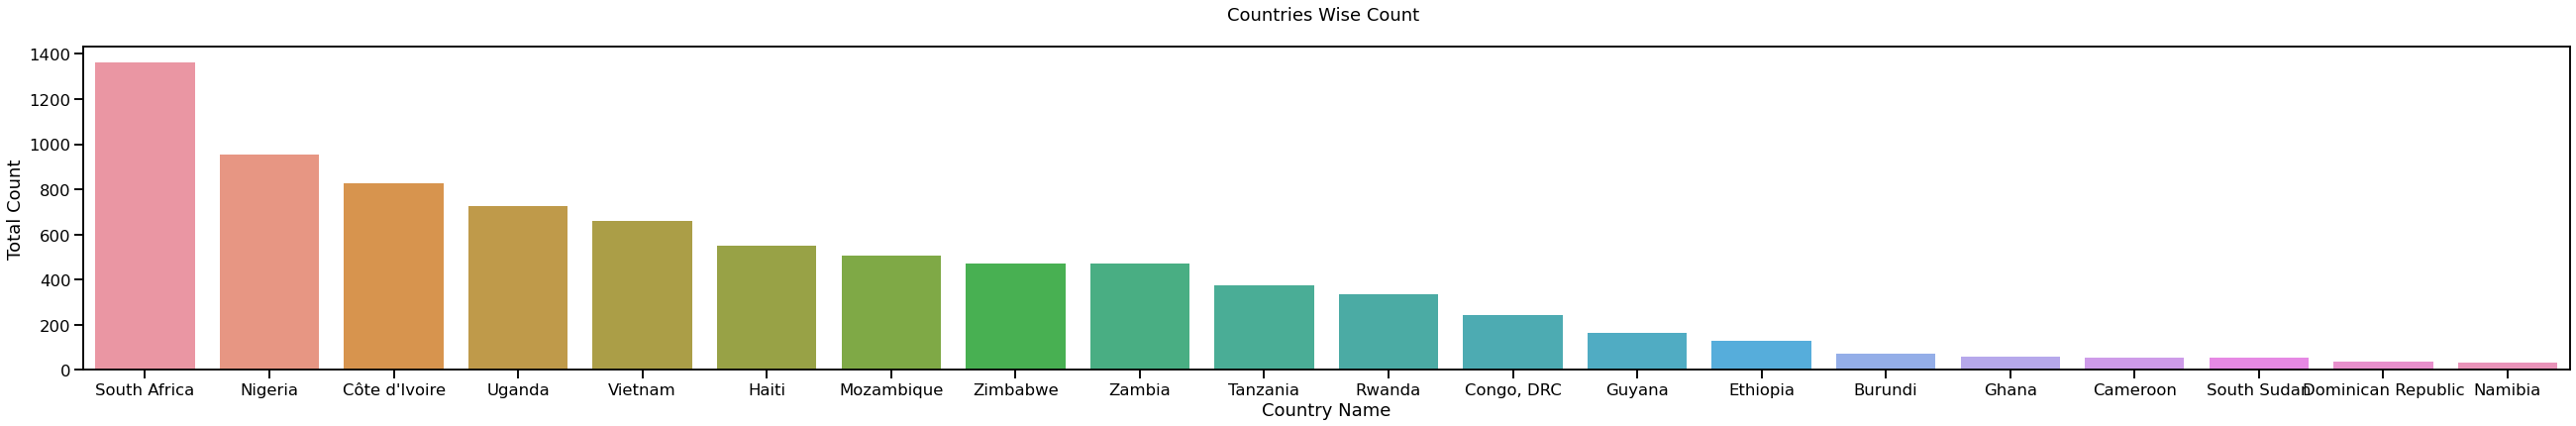

In [134]:
#top 10 countries wise count and graph plot

ItemCount = df["Country"].value_counts().nlargest(10)
print("Top 10 Countries Wise Count \n")
print(ItemCount)
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(45,6))
sns.countplot(df['Country'],order = df['Country'].value_counts().nlargest(20).index)
plt.title('Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')

In [135]:
#total countries in the dataset
len(df['Country'].unique())

34

In [136]:
#delivery delay calculation
df['Delivery_Delay']=df['Delivered to Client Date']-df['Scheduled Delivery Date']
df['Delivery_Delay']=df['Delivery_Delay'].dt.days
df['Delivery_Delay']

21        0
22        0
23        0
29        0
32        0
         ..
10319   -16
10320     6
10321    -6
10322   -36
10323   -27
Name: Delivery_Delay, Length: 8158, dtype: int64

-value shows it is ahead of the estimated time of delivery

In [137]:
df.groupby('Country')['Delivery_Delay'].mean().sort_values().reset_index()

,Country,Delivery_Delay
0,Guyana,-25.858025
1,Dominican Republic,-14.918919
2,Nigeria,-14.290966
3,Belize,-14.000000
4,Zimbabwe,-12.537155
5,South Africa,-12.107771
6,Burundi,-11.500000
7,Libya,-8.750000
8,Swaziland,-8.333333
9,Uganda,-8.162983


## Total Pack Price for Top 15 Countries with graph

Total Pack Price for Top 15 Countries

Country
South Africa          23479.74
Vietnam               11015.11
Nigeria               10293.74
Côte d'Ivoire         10174.96
Uganda                 9781.99
Mozambique             5782.10
Haiti                  5029.42
Tanzania               4727.47
Zambia                 3780.12
Rwanda                 3721.67
Zimbabwe               3359.62
Guyana                 2209.95
Congo, DRC             2148.15
Ethiopia               1202.37
Dominican Republic     1089.23
Name: Pack Price, dtype: float64


Text(0.5, 0, 'Country Name')

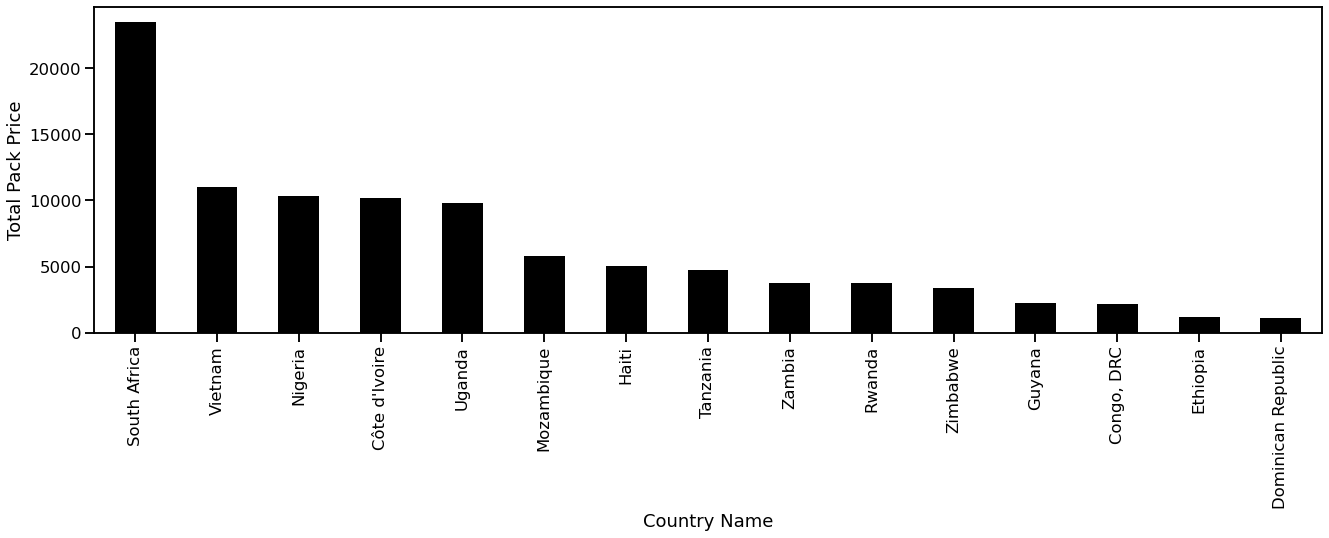

In [138]:
TotalPrice = df.groupby(['Country'])['Pack Price'].sum().nlargest(15)
print("Total Pack Price for Top 15 Countries\n")
print(TotalPrice)
plt.figure(figsize=(22,6))
GraphData=df.groupby(['Country'])['Pack Price'].sum().nlargest(15)
GraphData.plot(kind='bar',color='black')
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

## Top 10 Manufacturing Site for all Shipment Mode with Graph

Manufacturing Site
Aurobindo Unit III, India         2978
Mylan (formerly Matrix) Nashik    1407
Hetero Unit III Hyderabad IN       868
Cipla, Goa, India                  624
Strides, Bangalore, India.         528
ABBVIE Ludwigshafen Germany        350
ABBVIE (Abbott) Logis. UK          204
BMS Meymac, France                 129
Aspen-OSD, Port Elizabeth, SA      125
MSD, Haarlem, NL                   117
dtype: int64


Text(0.5, 0, 'Manufacturing Site Name')

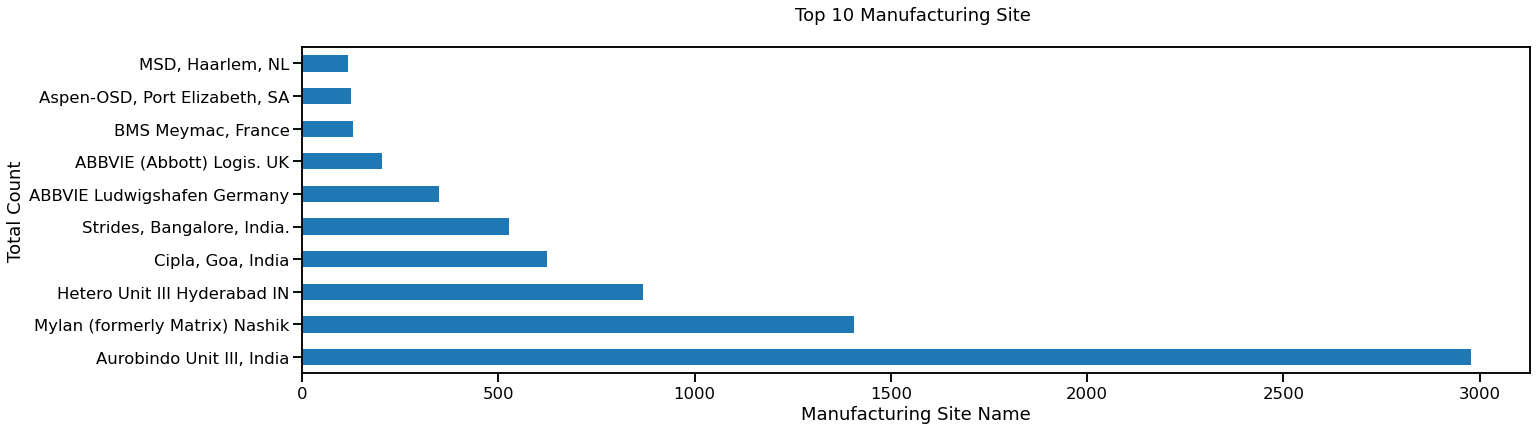

In [139]:
plt.figure(figsize=(22,6))
TopFiveManufacturingSite=df.groupby('Manufacturing Site').size().nlargest(10)
print(TopFiveManufacturingSite)
TopFiveManufacturingSite.plot(kind='barh')
plt.title('Top 10 Manufacturing Site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

In [140]:
df['Shipment Mode'].unique()

array(['Air', 'Truck', 'Air Charter', 'Ocean'], dtype=object)

C:\Users\anant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


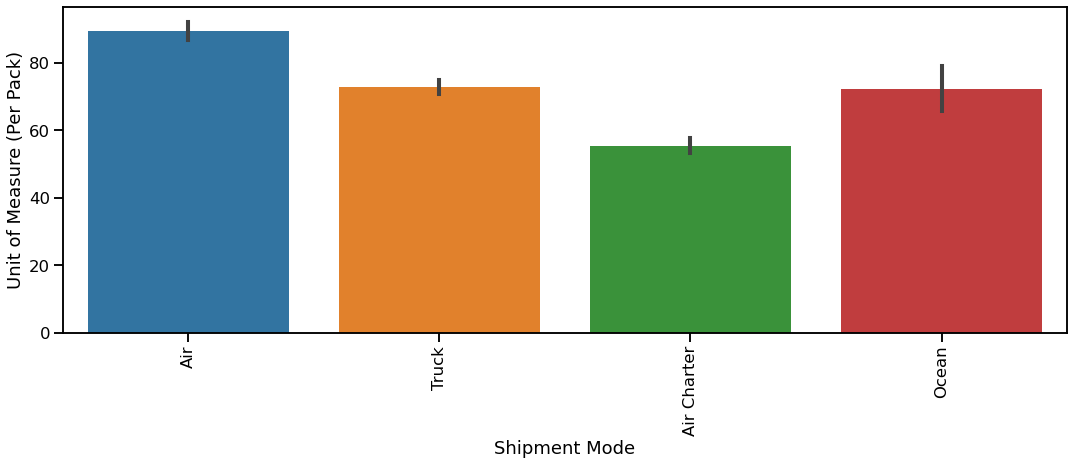

In [141]:
#Unit of measurement with shipment mode
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sns.barplot('Shipment Mode','Unit of Measure (Per Pack)', data = df)
plt.show()

Countries with Air Shipment

Vietnam               660
Côte d'Ivoire         539
Uganda                487
Haiti                 462
Nigeria               341
Congo, DRC            245
Rwanda                244
South Africa          230
Tanzania              182
Mozambique            169
Guyana                159
Ethiopia              124
Zimbabwe               97
Zambia                 81
Burundi                72
South Sudan            50
Ghana                  43
Cameroon               40
Dominican Republic     34
Namibia                24
Swaziland              18
Guatemala              15
Benin                  10
Lebanon                 8
Libya                   8
Botswana                3
Togo                    3
Angola                  3
Afghanistan             3
Kenya                   2
Senegal                 2
Burkina Faso            2
Belize                  1
Name: Country, dtype: int64


Text(0.5, 0, 'Country')

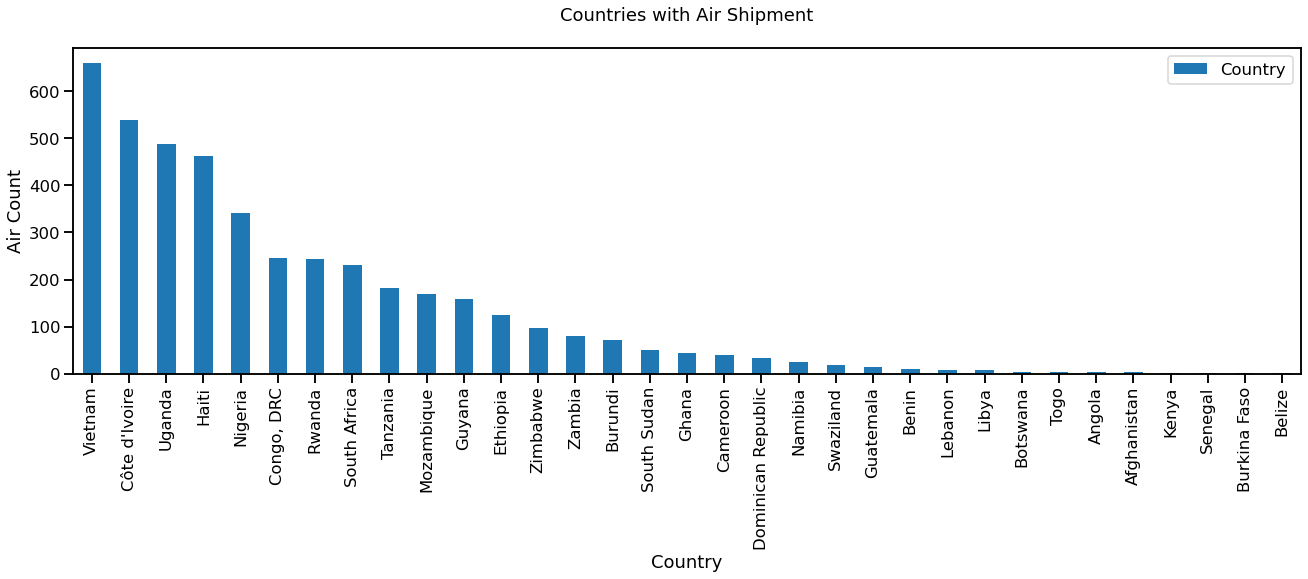

In [142]:
# Countries with Air Shipment
ItemData=df[df['Shipment Mode']=='Air']
df[df["Shipment Mode"]=='Air']['Country'].value_counts().to_frame().plot.bar(figsize=(22,6))
ItemSupplier = df[df["Shipment Mode"]=='Air']['Country'].value_counts()
print("Countries with Air Shipment\n")
print(ItemSupplier)
plt.title('Countries with Air Shipment\n')
plt.ylabel('Air Count')
plt.xlabel('Country')

Countries with Ocean Shipment 

South Africa          905
Zambia                386
Zimbabwe              353
Mozambique            337
Côte d'Ivoire         278
Uganda                229
Tanzania              186
Rwanda                 71
Ghana                  13
Namibia                 6
Dominican Republic      3
Guyana                  3
South Sudan             2
Kenya                   2
Ethiopia                2
Nigeria                 2
Vietnam                 1
Swaziland               1
Name: Country, dtype: int64


Text(0.5, 0, 'Country')

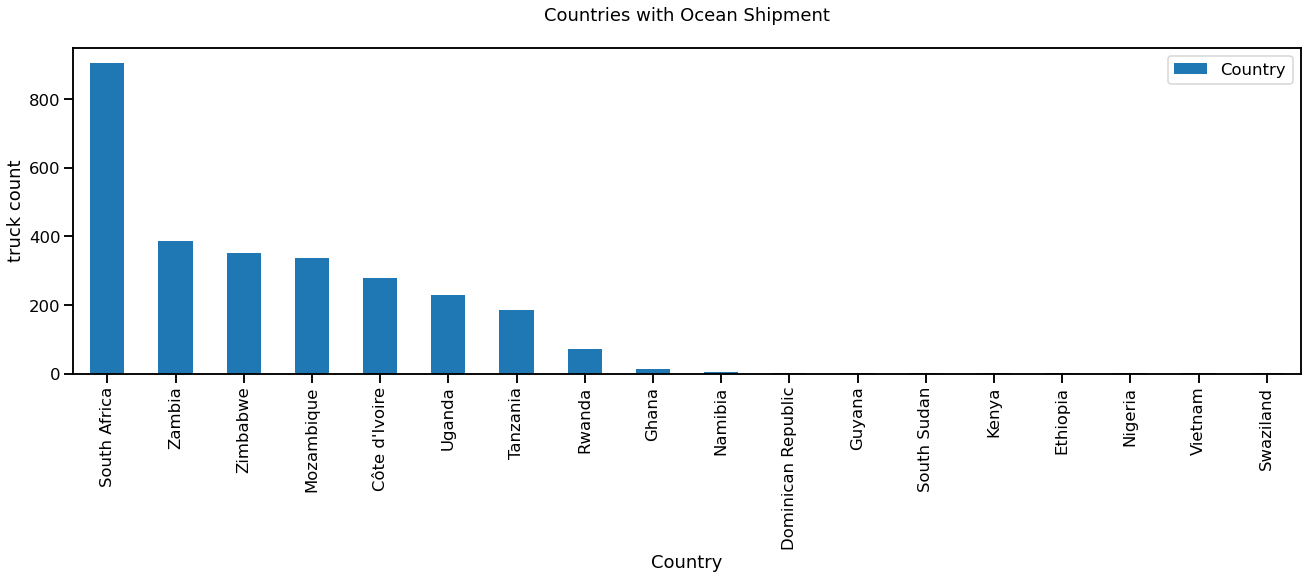

In [146]:
# Countries with Truck Shipment
ItemData=df[df['Shipment Mode']=='Truck']
df[df["Shipment Mode"]=='Truck']['Country'].value_counts().to_frame().plot.bar(figsize=(22,6))
ItemSupplier = df[df["Shipment Mode"]=='Truck']['Country'].value_counts()
print("Countries with Ocean Shipment \n")
print(ItemSupplier)
plt.title('Countries with Ocean Shipment\n')
plt.ylabel('truck count')
plt.xlabel('Country')

 Countries with Ocean Shipment 

South Africa          905
Zambia                386
Zimbabwe              353
Mozambique            337
Côte d'Ivoire         278
Uganda                229
Tanzania              186
Rwanda                 71
Ghana                  13
Namibia                 6
Dominican Republic      3
Guyana                  3
South Sudan             2
Kenya                   2
Ethiopia                2
Nigeria                 2
Vietnam                 1
Swaziland               1
Name: Country, dtype: int64


Text(0.5, 0, 'Country')

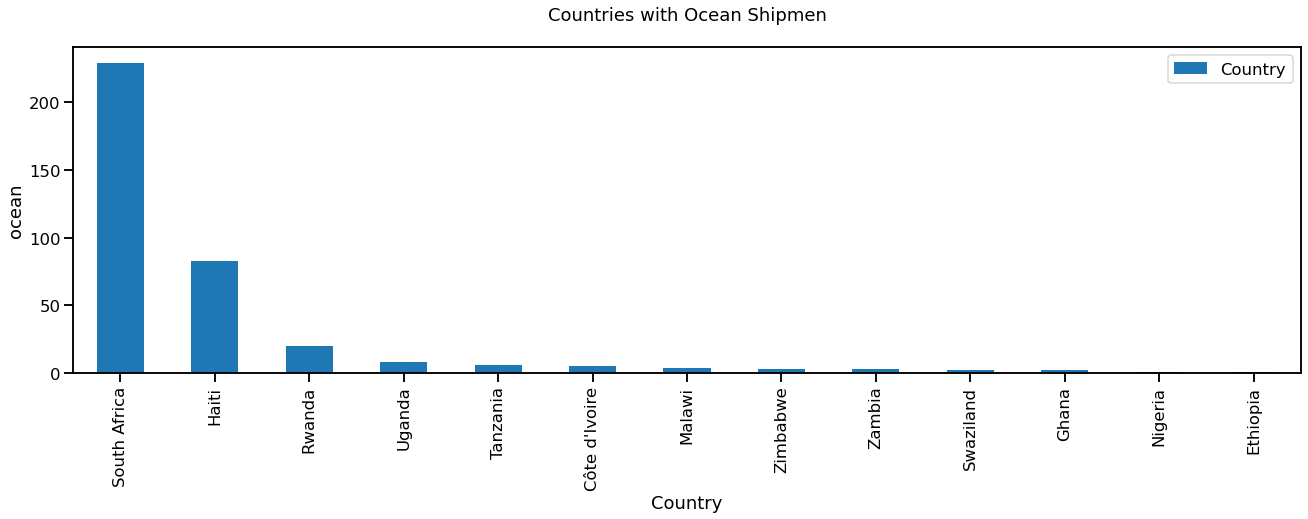

In [147]:
# Countries with Ocean Shipment
ItemData=df[df['Shipment Mode']=='Ocean']
df[df["Shipment Mode"]=='Ocean']['Country'].value_counts().to_frame().plot.bar(figsize=(22,6))
ItemSupplier = df[df["Shipment Mode"]=='Truck']['Country'].value_counts()
print(" Countries with Ocean Shipment \n")
print(ItemSupplier)
plt.title('Countries with Ocean Shipmen\n')
plt.ylabel('ocean')
plt.xlabel('Country')